<a href="https://colab.research.google.com/github/aludaiyaarasu/Mytest/blob/master/Random_forest_with_smote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [130]:
original_dataset = pd.read_csv('/content/drive/My Drive/trans.csv',delimiter=',',header=0)

In [131]:
original_dataset.isnull().sum()

Ref                                    0
Credit_Score                           0
Final_Grade                            0
Term                                   0
Net_Advance                            0
APR                                    0
Loan_Type                              0
Mosaic                                 0
Mosaic_Class                           0
Time_at_Address                        0
Residential_Status                     0
Telephone_Indicator                    0
Number_of_Dependants                   0
Marital_Status                         0
Gender                                 0
Time_in_Employment                     0
Employment_Status                      0
Full_Part_Time_Empl_Ind                0
Perm_Temp_Empl_Ind                     0
Income_Range                           0
Current_Account                        0
ACCESS_Card                            0
VISA_Card                              0
American_Express                       0
Diners_Card     

In [132]:
def label_class(row):
    if row['PPI_SINGLE'] == 1:
        return 'single'
    if row['PPI_JOINT'] == 1:
        return 'joint'
    if row['PPI_LCI'] == 1:
        return 'lci'

In [133]:
original_dataset['class'] = original_dataset.apply (lambda row: label_class(row), axis=1)

In [134]:
data_preprocessced = original_dataset

In [135]:
data_ready_for_pipeline_train_test = data_preprocessced[data_preprocessced['PPI'].isin(['1'])]
data_ready_for_pipeline_scoring = data_preprocessced[data_preprocessced['PPI'].isin(['0'])]

In [136]:
data_ready_for_pipeline_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9461 entries, 1 to 16381
Data columns (total 60 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Ref                               9461 non-null   int64  
 1   Credit_Score                      9461 non-null   int64  
 2   Final_Grade                       9461 non-null   object 
 3   Term                              9461 non-null   int64  
 4   Net_Advance                       9461 non-null   float64
 5   APR                               9461 non-null   float64
 6   Loan_Type                         9461 non-null   object 
 7   Mosaic                            9461 non-null   int64  
 8   Mosaic_Class                      9461 non-null   int64  
 9   Time_at_Address                   9461 non-null   int64  
 10  Residential_Status                9461 non-null   object 
 11  Telephone_Indicator               9461 non-null   object 
 12  Numbe

In [137]:
product_map_status={'lci':1,'single':2,'joint':3}
data_ready_for_pipeline_train_test['class'] = data_ready_for_pipeline_train_test['class'].map(product_map_status)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [138]:
y = data_ready_for_pipeline_train_test.pop('class')

In [139]:
X = data_ready_for_pipeline_train_test

In [140]:
num_vars =['Credit_Score','Term','Net_Advance','APR','Mosaic','Time_at_Address','Number_of_Dependants','Time_in_Employment','Time_with_Bank','Outstanding_Mortgage_Bal','Total_Outstanding_Balances','Bureau_Data___Monthly_Other_Co_R','Age','Total_outstanding_balance__mortg','Total_value__Public_Info___CCJ__','Time_since_most_recent_Public_In','Total_value__CAIS_8_9s','Searches___Total___L6m','Years_on_ER_for_SP','Total_outstanding_balance___excl','Total___of_accounts','Time_since_most_recent_outstandi']
cat_vars=['Final_Grade','Loan_Type','Mosaic_Class','Residential_Status','Telephone_Indicator','Marital_Status','Gender','Employment_Status','Full_Part_Time_Empl_Ind','Perm_Temp_Empl_Ind','Income_Range','Current_Account','ACCESS_Card','VISA_Card','American_Express','Diners_Card','Cheque_Guarantee','Other_Credit_Store_Card','Worst_History_CT','Payment_Method','Total___Public_Info___CCJ____ban','Worst_status_L6m','Worst_CUrrent_Status','__of_status_3_s_L6m','Bankruptcy_Detected__SP_','Total___outstanding_CCJ_s','CIFAS_detected']

In [141]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

Class=0, n=1972 (20.843%)
Class=2, n=1225 (12.948%)
Class=1, n=6264 (66.209%)


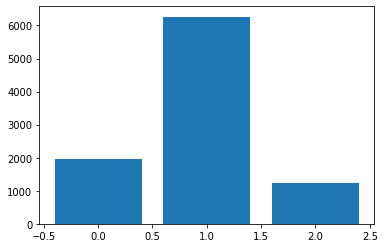

In [142]:
y = LabelEncoder().fit_transform(y)
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [143]:
oversample = SMOTE()

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state = 50)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 10065 to 2141
Data columns (total 59 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Ref                               1893 non-null   int64  
 1   Credit_Score                      1893 non-null   int64  
 2   Final_Grade                       1893 non-null   object 
 3   Term                              1893 non-null   int64  
 4   Net_Advance                       1893 non-null   float64
 5   APR                               1893 non-null   float64
 6   Loan_Type                         1893 non-null   object 
 7   Mosaic                            1893 non-null   int64  
 8   Mosaic_Class                      1893 non-null   int64  
 9   Time_at_Address                   1893 non-null   int64  
 10  Residential_Status                1893 non-null   object 
 11  Telephone_Indicator               1893 non-null   object 
 12  Nu

In [145]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

col_trans = make_column_transformer(
                        (OneHotEncoder(),cat_vars),
                        remainder = "passthrough"
                        )

drop_Columns=['Ref','Insurance_Description','PPI','code','prdt_desc','category','PPI_SINGLE','PPI_JOINT','PPI_LCI']


In [152]:
X_test.drop(drop_Columns,inplace=True,axis=1)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 10065 to 2141
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Credit_Score                      1893 non-null   int64  
 1   Final_Grade                       1893 non-null   object 
 2   Term                              1893 non-null   int64  
 3   Net_Advance                       1893 non-null   float64
 4   APR                               1893 non-null   float64
 5   Loan_Type                         1893 non-null   object 
 6   Mosaic                            1893 non-null   int64  
 7   Mosaic_Class                      1893 non-null   int64  
 8   Time_at_Address                   1893 non-null   int64  
 9   Residential_Status                1893 non-null   object 
 10  Telephone_Indicator               1893 non-null   object 
 11  Number_of_Dependants              1893 non-null   int64  
 12  Ma

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [157]:
print(X_train.shape)
print(X_test.shape)


(7568, 154)
(1893, 154)


In [158]:
X_train,y_train = SMOTE().fit_resample(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [159]:
print(X_train.shape)
print(y_train.shape)

(15000, 154)
(15000,)


Class=2, n=5000 (52.849%)
Class=0, n=5000 (52.849%)
Class=1, n=5000 (52.849%)


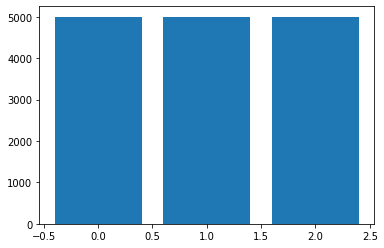

In [177]:
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [160]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(
                      min_samples_leaf=50,
                      n_estimators=150,
                      bootstrap=True,
                      oob_score=True,
                      n_jobs=-1,
                      random_state=50,
                      max_features='auto',class_weight='balanced')

In [161]:
pipe = make_pipeline(rf_classifier)
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight='balanced',
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=50,
                                        min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=150, n_jobs=-1,
                                        oob_score=True, random_state=50,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [162]:
y_pred = pipe.predict(X_test)

In [163]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score
accuracy_score(y_test, y_pred)
print(f"The accuracy of the model is {round(accuracy_score(y_test,y_pred),3)*100} %")

The accuracy of the model is 67.30000000000001 %


In [165]:
train_probs = pipe.predict_proba(X_train)[:,1] 
probs = pipe.predict_proba(X_test)[:, 1]
train_predictions = pipe.predict(X_train)

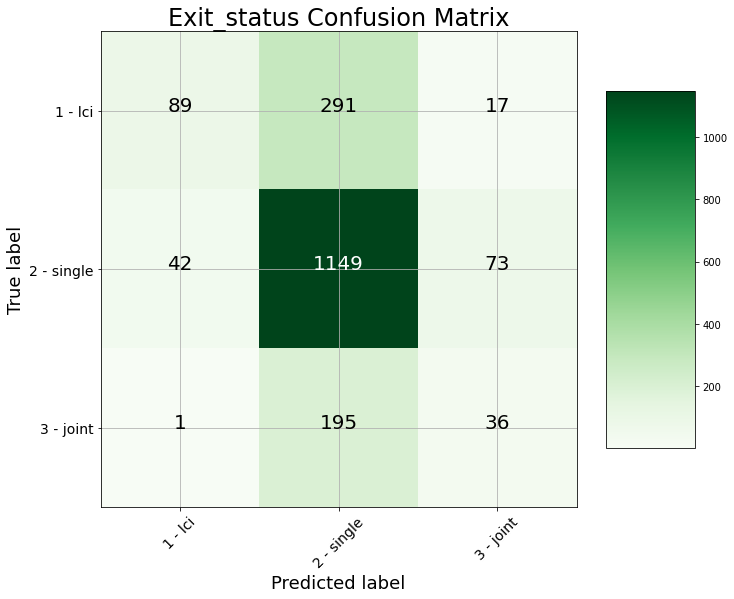

In [167]:
import itertools
import numpy as np
def plot_confusion_matrix(cm, classes, normalize = False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens): # can change color 
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Label the plot
    for i, j in itertools.product(range(cm.shape[0]),   range(cm.shape[1])):
     plt.text(j, i, format(cm[i, j], fmt), 
             fontsize = 20,
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

# Let's plot it out
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['1 - lci', '2 - single', '3 - joint'],
                      title = 'Exit_status Confusion Matrix')

In [168]:
print(rf_classifier.feature_importances_)
print(f" There are {len(rf_classifier.feature_importances_)} features in total")


[9.01109391e-03 2.18184413e-03 2.34726543e-03 3.00124759e-04
 4.29745358e-04 9.04722442e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.82030373e-03 2.26640143e-03 2.04282237e-03
 1.23591204e-04 9.65479450e-04 5.50926363e-04 3.58774602e-03
 0.00000000e+00 2.49583004e-04 1.34123783e-03 5.44780867e-03
 5.05008370e-07 1.16574222e-04 0.00000000e+00 0.00000000e+00
 1.76407861e-03 3.63826671e-03 0.00000000e+00 2.03489835e-03
 1.89320758e-04 2.63310005e-04 2.62001123e-02 1.03038050e-01
 5.48263774e-02 7.14107837e-03 1.52409598e-02 1.25969327e-02
 1.65511533e-02 1.40278342e-02 0.00000000e+00 0.00000000e+00
 6.69349905e-02 6.56658352e-02 7.12001407e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 7.93457936e-04 1.57229280e-02
 2.62034055e-02 9.17620253e-03 2.34301094e-02 4.50281854e-02
 0.00000000e+00 0.00000000e+00 7.43416707e-03 5.85237038e-03
 9.88368973e-03 8.62747573e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

In [179]:
def encode_and_bind(original_dataframe, features_to_encode):
    dummies = pd.get_dummies(original_dataframe[features_to_encode])
    res = pd.concat([dummies, original_dataframe], axis=1)
    res = res.drop(features_to_encode, axis=1)
    return(res)
X_train_encoded = encode_and_bind(X_train, features_to_encode='cat_vars')

IndexError: ignored

In [180]:
feature_importances = list(zip(X_train, rf_classifier.feature_importances_))
# Then sort the feature importances by most important first
feature_importances_ranked = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Feature: {:35} Importance: {}'.format(*pair)) for pair in feature_importances_ranked];

TypeError: ignored